In [1]:
# Standards import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
data = pd.read_csv('/content/drive/MyDrive/Data/income.csv - income.csv.csv')

In [3]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
# Checking for null values

data.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

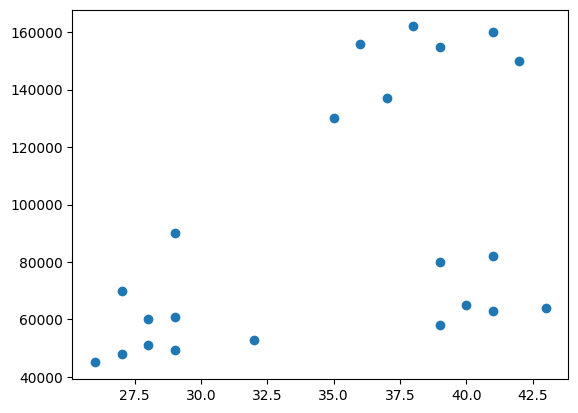

In [24]:
data.columns = data.columns.str.strip()
plt.scatter(data['Age'],data['Income($)'])
plt.show()

In [32]:
data.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(data)
data['cluster'] = km.predict(data)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


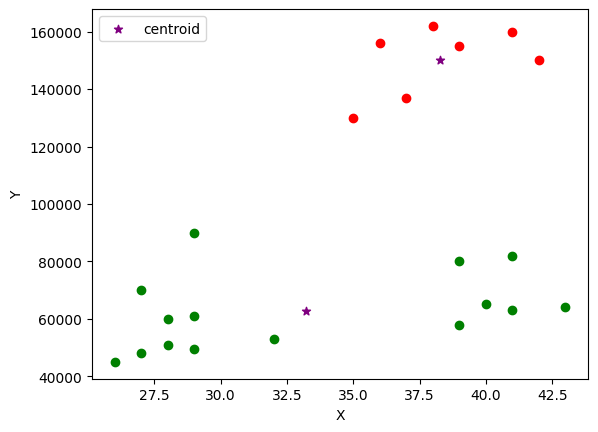

In [40]:
y_pred = km.fit_predict(data)
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [43]:
km.cluster_centers_

array([[ 3.32000000e+01,  6.26333333e+04, -5.55111512e-17],
       [ 3.82857143e+01,  1.50000000e+05,  1.00000000e+00]])

In [44]:
km.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [51]:
sample_test = np.array([40, 140000, 1])
second_test=sample_test.reshape(1,-1)
predicted_label = km.predict(second_test)[0]
print(f"Predicted cluster label for the new test data: {predicted_label}")

Predicted cluster label for the new test data: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
